# Table of Contents

(1) Introduction

(2) Data Wrangling

(3) Exploratory Data Analysis and Conclusions (Right below the visual plots in Markdown cells)

# Introduction

Movie industry is one of the most popular industry across the world and it is a source of entertainment for most of us. Movies 
also create employment opportunities and this industry is estimated to be worth of billions of dollars. In the following 
analyis, we will be analysing the trends/patterns associated with various feetures in the dataset. This data set contains 
information about 10,000 movies collected from The Movie Database (TMDb), including informative features like overview of the movie, genres, runtime, budget etc and the metric features like popularity, user votings, and revenue.

And, here are the some of the questions that I have answered using following data analysis

(1) What are the top popular films ?

(2) What is 

    (i)   The revenue generated by the top films ?
     
    (ii)  The budget required to produce the top films ?

    (iii) The runtime of the top films ?

(3) Which are the genres have the high popularity score ?

(4) How has been the trends of no of movies realsed, popuarity and revenue over the years ?

(5) Who are the actors appeared most which production houses produced the most?

# Data Wrangling

Importing the required packages for the analysis

In [505]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [507]:
tmdb = pd.read_csv('tmdb-movies.csv')

tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [508]:
print( 'The shape of the TMDb dataset is : ', tmdb.shape)

The shape of the TMDb dataset is :  (10866, 21)


Our dataset consits of 10866 rows and 21 columns

In [509]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [510]:
tmdb.drop(['id', 'imdb_id','homepage', 'tagline', 'overview', 'release_date'], axis = 1, inplace = True)

I have drpopped `id`, `imdb_id`,`homepage`, `tagline`, `overview` from the dataset as they are not much helpful for our analysis and even `release_date` as I'm interested in yearly analysis.

In [511]:
tmdb.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can observe that the features `cast`,  `director`,  `keywords`,  `genres`,  `production_companies` has missing values. The feature `keywords` the most and the `genres` has the least missing values. Since these are considerably less considering the overall length of dataset, I have decided to all the rows which has null values in any of the above mentioned features. 


In [512]:
tmdb.dropna(inplace = True)

In [513]:
print( 'The shape of the TMDb dataset is : ', tmdb.shape)

The shape of the TMDb dataset is :  (8667, 15)


Now, we can see the shape of our dataset changed as we dropped rows with `Nan` values and `irrelavant_features`

In [515]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 15 columns):
popularity              8667 non-null float64
budget                  8667 non-null int64
revenue                 8667 non-null int64
original_title          8667 non-null object
cast                    8667 non-null object
director                8667 non-null object
keywords                8667 non-null object
runtime                 8667 non-null int64
genres                  8667 non-null object
production_companies    8667 non-null object
vote_count              8667 non-null int64
vote_average            8667 non-null float64
release_year            8667 non-null int64
budget_adj              8667 non-null float64
revenue_adj             8667 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.1+ MB


In [516]:
tmdb.budget = tmdb.budget.astype('float64')
tmdb.revenue = tmdb.revenue.astype('float64')
tmdb.runtime = tmdb.runtime.astype('float64')
tmdb.release_year = tmdb.release_year.astype('object')

In [517]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 15 columns):
popularity              8667 non-null float64
budget                  8667 non-null float64
revenue                 8667 non-null float64
original_title          8667 non-null object
cast                    8667 non-null object
director                8667 non-null object
keywords                8667 non-null object
runtime                 8667 non-null float64
genres                  8667 non-null object
production_companies    8667 non-null object
vote_count              8667 non-null int64
vote_average            8667 non-null float64
release_year            8667 non-null object
budget_adj              8667 non-null float64
revenue_adj             8667 non-null float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.1+ MB


Modified the datatypes of the features `budget`, `revenue`, `runtime` to `float64` as these featues are continous in nature so there is absolute possobility that these feature holding float values and `release_year` to `object`

In [518]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,8667.000000,8.667000e+03,8.667000e+03,8667.000000,8667.000000,8667.000000,8.667000e+03,8.667000e+03
mean,0.741920,1.771079e+07,4.924306e+07,103.813776,264.187031,6.003496,2.130849e+07,6.361717e+07
std,1.087596,3.357194e+07,1.289465e+08,26.205981,635.161318,0.893552,3.710067e+07,1.592796e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.250007,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,0.000000e+00,0.000000e+00
50%,0.449397,1.500000e+06,1.805900e+05,100.000000,54.000000,6.100000,2.139935e+06,1.905315e+05
75%,0.842818,2.100000e+07,3.890220e+07,113.000000,200.000000,6.600000,2.811797e+07,5.521258e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,4.250000e+08,2.827124e+09


The above table is of descriptive statistics of quantitative data in our TMDb dataset and here are the following observations 

(1) The minimum, avergae and maximum values of `popularity` are `0.000065`, `0.646441` and `32.985763` respectively

(2) The minimum values of the features `budget`, `runtime` showing that they are 0.00 and from our real life experiance, this doesn't make any sense as a movie cannot made with zero currency as somehow it needs funding even though it is a crowd-funded film and in the same way, no movie can't be a duration of zero minutes. So we will dive little deep to see what's going on here.

In [520]:
tmdb.loc[tmdb.runtime == 0]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876037,0.0,0.0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0.0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015,0.000000e+00,0.0
334,0.357654,0.0,0.0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,biography|soccer player,0.0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",80,6.5,2015,0.000000e+00,0.0
486,0.176744,0.0,0.0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,woman director,0.0,TV Movie|Drama,A+E Studios|Jane Startz Productions,11,5.4,2015,0.000000e+00,0.0
1289,0.037459,3250000.0,0.0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,kidnapping|brutality|violence|teenager|discovery,0.0,Thriller|Horror|Mystery,Tiberius Film,16,3.4,2014,2.993546e+06,0.0
1293,0.036904,0.0,0.0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,brazilian|biography|music|drama|documentary,0.0,Documentary|Drama|Music,Globo Filmes,14,6.0,2014,0.000000e+00,0.0
5920,0.165765,0.0,0.0,The Food Guide to Love,Richard Coyle|Leonor Watling|GinÃ©s GarcÃ­a Mi...,Dominic Harari|Teresa Pelegri,woman director,0.0,Romance|Comedy,Haut et Court|Parallel Film Productions|Fox In...,12,5.6,2013,0.000000e+00,0.0
5938,0.147188,0.0,0.0,Go Goa Gone,Saif Ali Khan|Anand Tiwari|Vir Das|Pooja Gupta,Krishna D.K.|Raj Nidimoru,hindi|zombies island|zombies|zombie survival,0.0,Comedy|Horror,Eros International,16,5.3,2013,0.000000e+00,0.0


I have tried to see the all the places where it's showing the zero and found out that the values of budget and revenue are also zero in those locaions.

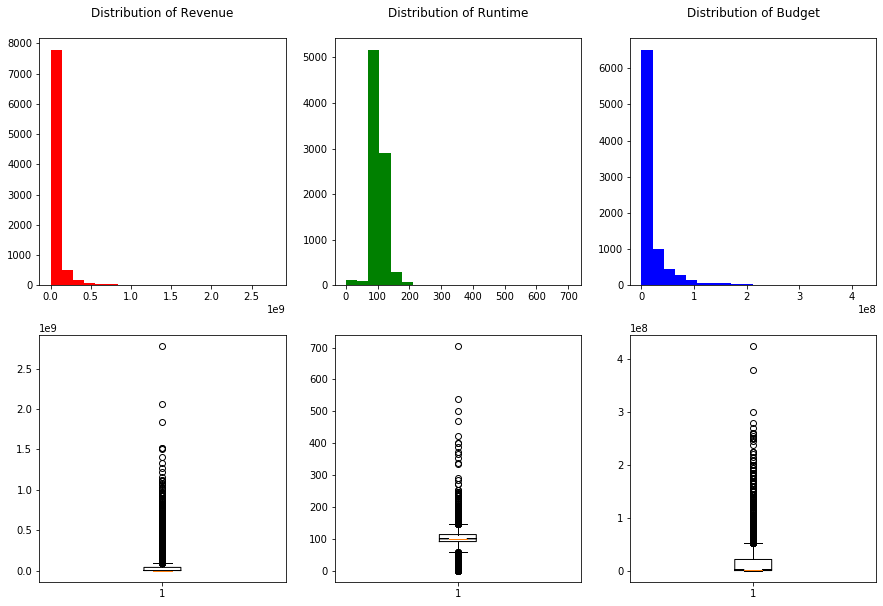

In [521]:
fig, axs = plt.subplots(2,3, sharex = False, sharey = False, tight_layout = False, figsize=(15, 10))

axs[0,0].hist(tmdb.revenue, bins = 20, color = 'r');
axs[0,0].set_title('Distribution of Revenue\n');

axs[0,1].hist(tmdb.runtime, bins = 20,  color = 'g');
axs[0,1].set_title('Distribution of Runtime\n');

axs[0,2].hist(tmdb.budget, bins = 20,  color = 'b');
axs[0,2].set_title('Distribution of Budget\n');

axs[1,0].boxplot(tmdb.revenue, 'r');

axs[1,1].boxplot(tmdb.runtime,  'g');

axs[1,2].boxplot(tmdb.budget,  'b');



Since, those zero values doesn't make sense, I have decided to replace them with median after observing the distribution and outliers

In [522]:
tmdb.budget.replace(0, np.median(tmdb.budget), inplace = True)
tmdb.runtime.replace(0, np.median(tmdb.runtime), inplace = True)
tmdb.revenue.replace(0, np.median(tmdb.revenue), inplace = True)

# Exploratory Data Analysis and Conclusions

In [523]:
tmdb.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


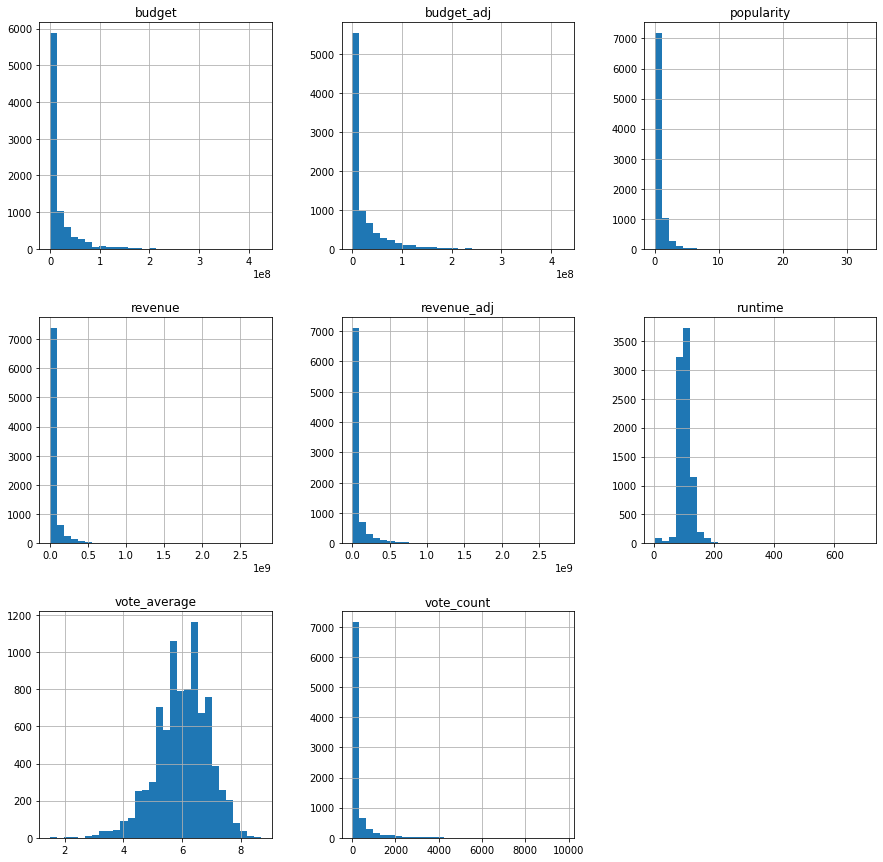

In [524]:
tmdb.hist(figsize = (15,15), bins = 30);

#### Observations :

(1) The `budget` is heavily right skewed with most of the values in between `0` and `0.5e8`

(2) The `popularity` is heavily right skewed with most of the values in between `0` and `4`

(3) The `revenue` is heavily right skewed with most of the values in between `0` and `0.3e8`

(4) The `runtime` is approximately following normal distribution with most of the values in between `8` and `120`

(5) The `vote_average` is approximately following normal distribution with most of the values in between `5` and `7`

(6) The `vote_count` is heavily right skewed with most of the values in between `0` and `1000`

(7) The `release_year` is left skewed and no. of movies increasing exponentially with the time.

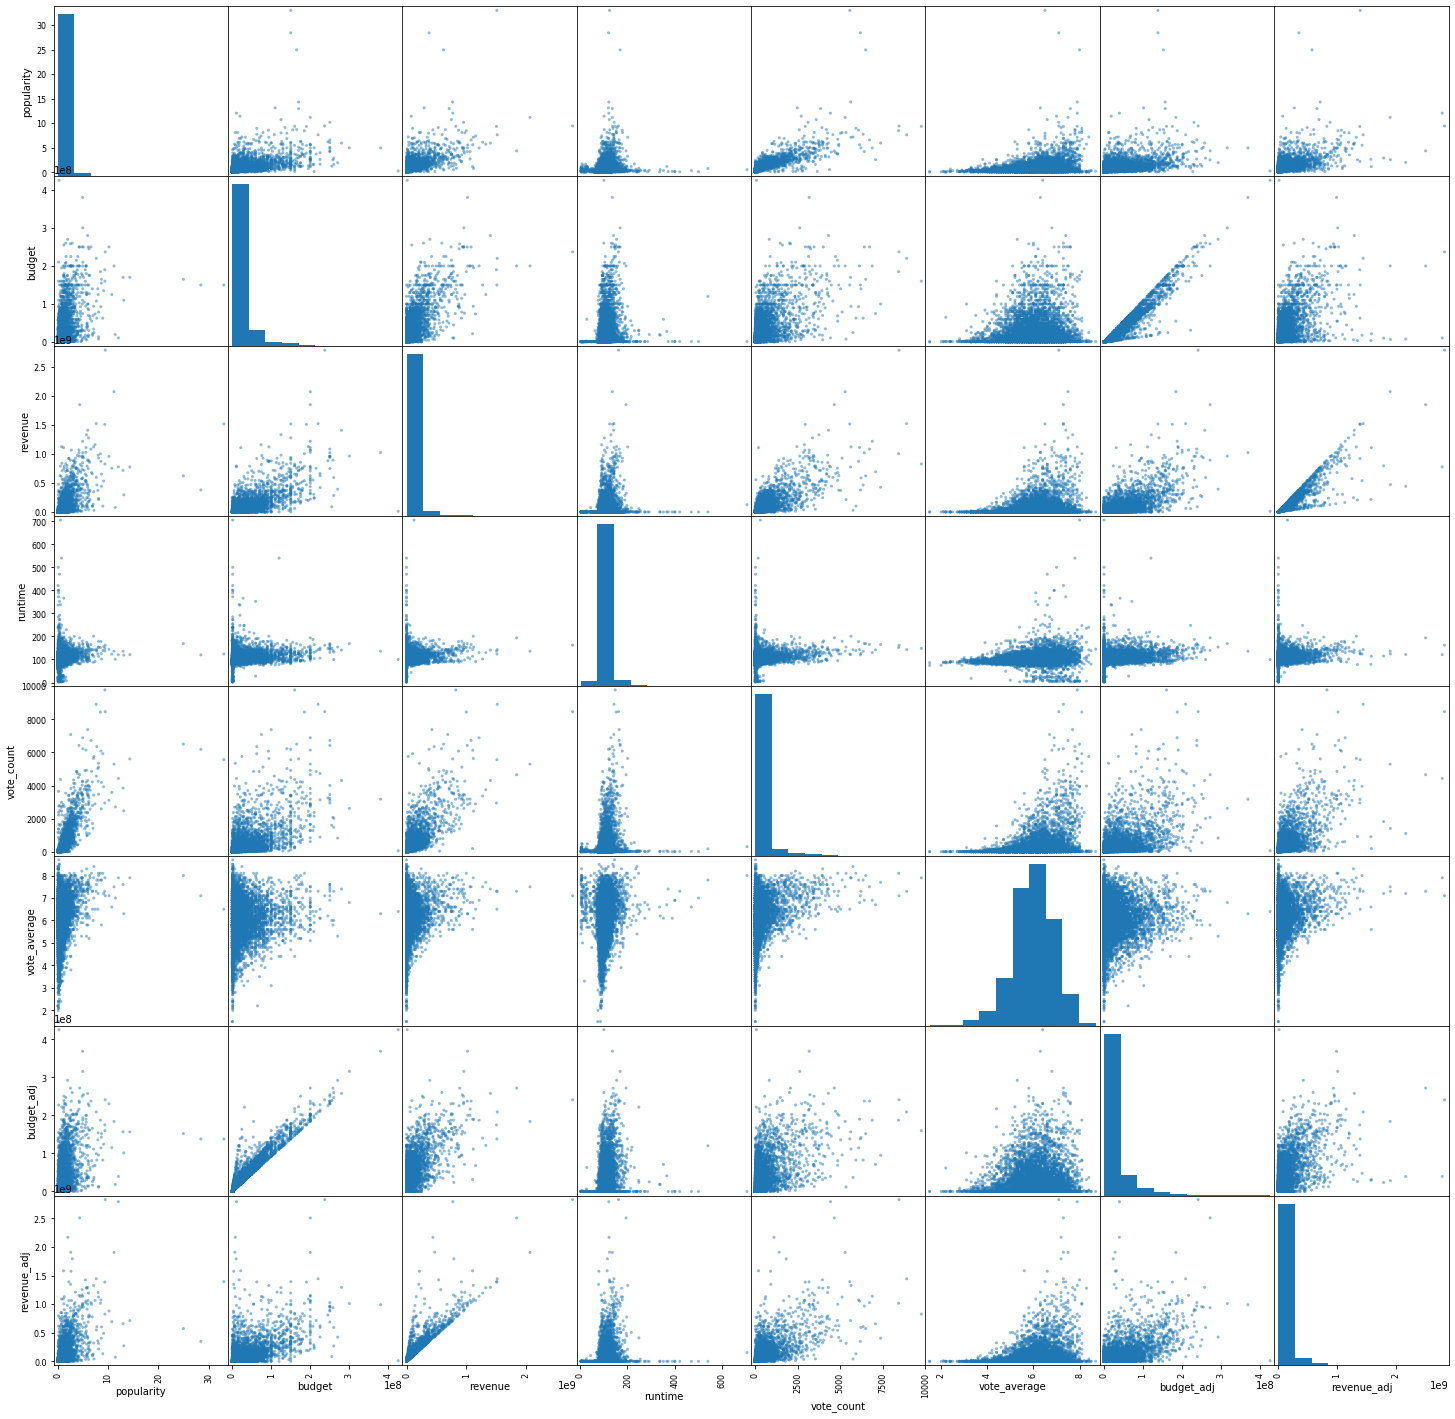

In [525]:
pd.plotting.scatter_matrix(tmdb, figsize = (25,25));

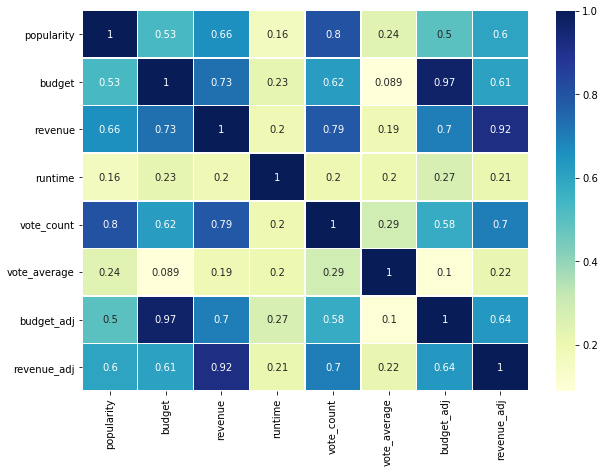

In [526]:
plt.figure(figsize = (10,7))
sns.heatmap(tmdb.corr(), annot=True, linewidths=.5, cmap="YlGnBu");

#### Observations :



Note : 

I have assumed > |0.85| as very high correlation and >  |0.60| to < |0.85| as high correlation

Following are the points that I have observed from the scatter plots matrix and heatmap.




Very high correlation combinations:


(i) `budject_adj` and `budget` 

(ii) `revenue_adj` and `revenue` 



High correlation combinations:



(i) `popularity` with all of (`revenue`, `vote_count`, `revenue_adj`)

(ii) `budget` with all of (`vote_count`, `revenue`, `revenue_adj`)

(iii) `revenue` with all of (`budget_adj`, `vote_count`)

(iv) `vote_count` with `revenue_adj`

## Answering the Questions

For the following analysiis 

(1) I'm considering `popularity` as my target variable

(2) `runtime` in minutes and `budget` in dollars ($)

(3) I'm considering top-50 movies according to the popularity score, as top movies

In [527]:
tmdb.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


### (1) What are the top popular films ?

In [528]:
tmdb_top_50_movies = tmdb.sort_values(by=['popularity'], ascending = False).head(50)

In [529]:
tmdb_top_50_movies = tmdb_top_50_movies[['original_title', 'popularity', 'runtime', 'budget', 'revenue']]

In [530]:
tmdb_top_50_movies = tmdb_top_50_movies.reset_index(drop=True)

In [531]:
tmdb_top_50_movies.head(10)

,original_title,popularity,runtime,budget,revenue
0,Jurassic World,32.985763,124.0,150000000.0,1.513529e+09
1,Mad Max: Fury Road,28.419936,120.0,150000000.0,3.784364e+08
2,Interstellar,24.949134,169.0,165000000.0,6.217525e+08
3,Guardians of the Galaxy,14.311205,121.0,170000000.0,7.733124e+08
4,Insurgent,13.112507,119.0,110000000.0,2.952382e+08
5,Captain America: The Winter Soldier,12.971027,136.0,170000000.0,7.147666e+08
6,Star Wars,12.037933,121.0,11000000.0,7.753980e+08
7,John Wick,11.422751,101.0,20000000.0,7.873990e+07
8,Star Wars: The Force Awakens,11.173104,136.0,200000000.0,2.068178e+09
9,The Hunger Games: Mockingjay - Part 1,10.739009,123.0,125000000.0,7.521002e+08


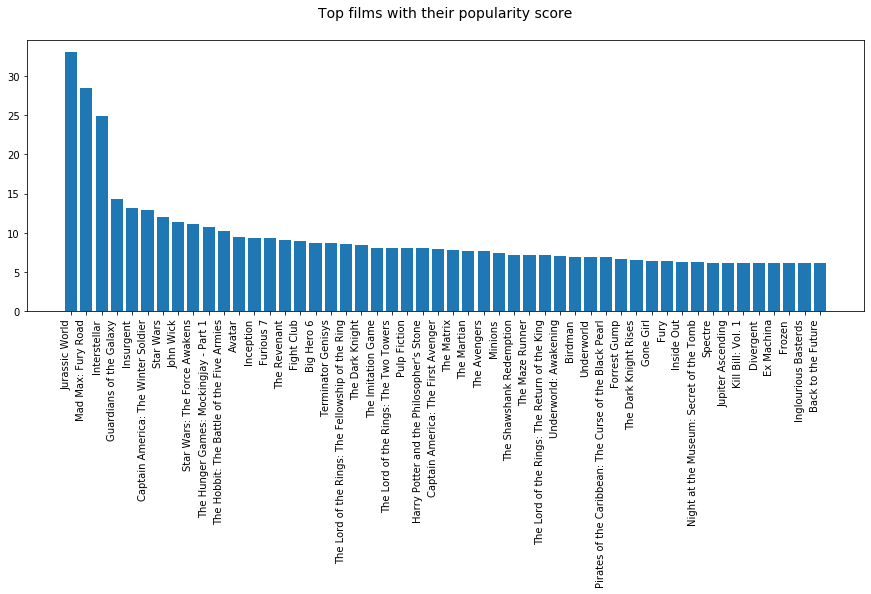

In [532]:
plt.figure(figsize = (15,5))
plt.bar(tmdb_top_50_movies['original_title'], tmdb_top_50_movies['popularity']);
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light',fontsize='medium');
plt.title('Top films with their popularity score\n', fontsize = 14);

### Conclusion

Here is the barplot of the popularity scores for the top movies and Jurassic World topping the list with a highest popularity of 32.98

### (2) What is 

#### (i) The revenue generated by the top films ?
     
#### (ii) The budget required to produce the top films ?

#### (iii) The runtime of the top films ?

In [533]:
np.mean(tmdb_top_50_movies.revenue)

673329495.12

In [534]:
np.mean(tmdb_top_50_movies.budget)

113280000.06

In [535]:
np.mean(tmdb_top_50_movies.runtime)

133.04

### Conclusions  : 

On average,

The total revenue generated by the top films is 673.329495 million dollars

The total budget required for the top films is 113.28 million dollars

The average time of top films is ~ 133 minutes


### (3) Which are the genres have the high popularity score ?


In [536]:
top_genres = pd.DataFrame(tmdb.groupby('genres')['popularity'].mean().sort_values(ascending = False).head(10))

In [537]:
top_genres

,popularity
genres,
Adventure|Science Fiction|Thriller,13.112507
Adventure|Drama|Science Fiction,12.699699
Science Fiction|Adventure|Thriller,10.739009
Action|Thriller|Science Fiction|Mystery|Adventure,9.363643
Western|Drama|Adventure|Thriller,9.110700
Adventure|Family|Animation|Action|Comedy,8.691294
Science Fiction|Action|Thriller|Adventure,8.654359
History|Drama|Thriller|War,8.110711
Drama|Adventure|Science Fiction,7.667400


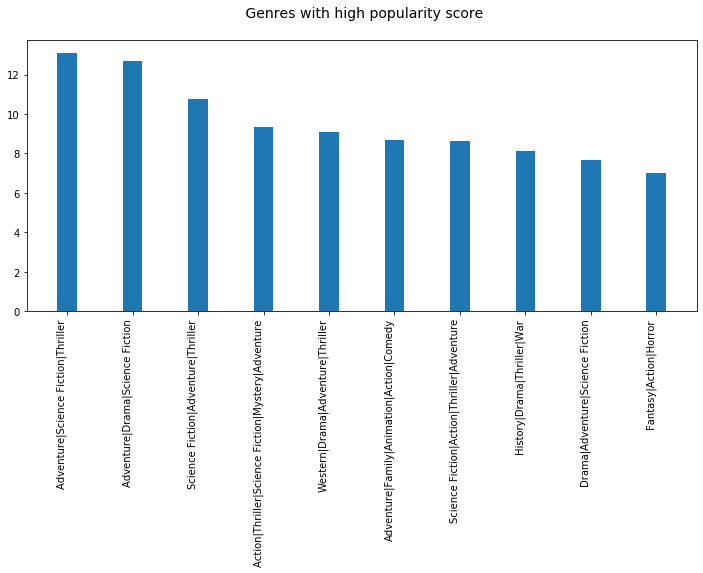

In [538]:
plt.figure(figsize = (12,5))
plt.bar(top_genres.index, top_genres['popularity'], width = 0.3);
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light',fontsize= 10);
plt.title(' Genres with high popularity score\n', fontsize = 14);

### Conclusion:

The movies revolving around genres including Adevture, Thriller, Science Fiction, Drama, Thriller have hig popularity

In [539]:
tmdb.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


### (4) How has been the trends of no of movies realsed, popuarity and revenue over the years ?

In [540]:
movies_by_year = pd.DataFrame(tmdb.groupby('release_year')['release_year'].count())

movies_by_year.rename({'release_year': 'year', 'release_year': 'count'}, axis=1, inplace=True)

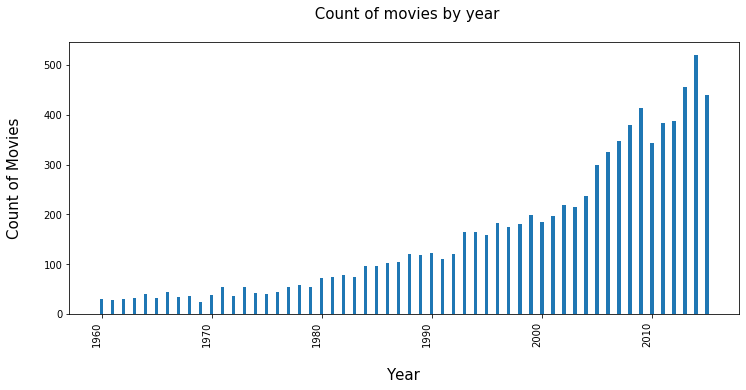

In [541]:
plt.figure(figsize = (12,5))
plt.bar(movies_by_year.index, movies_by_year['count'], width = 0.3);
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light',fontsize= 10);
plt.title(' Count of movies by year\n', fontsize = 15);
plt.xlabel('\nYear', fontsize = 15);
plt.ylabel('Count of Movies\n', fontsize = 15);

### Conclusion:

The no. of movies getting released every year with the year 2014 as highest count with 500+ movies gettin released. And the growth of count of movies is exponential. Till 2000 the count has been < 200 and after 2000, we can observe a significant improvement in the count of movies relsead.

In [542]:
popularity_by_year = pd.DataFrame(tmdb.groupby('release_year')['popularity'].mean())

popularity_by_year.rename({'release_year': 'year', 'release_year': 'popularity'}, axis=1, inplace=True)

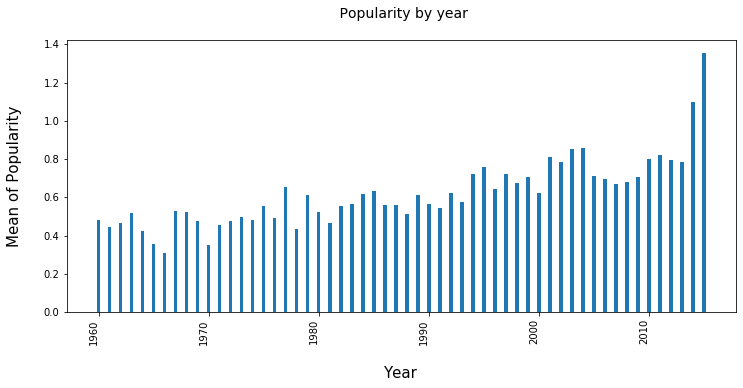

In [543]:
plt.figure(figsize = (12,5))
plt.bar(popularity_by_year.index, popularity_by_year['popularity'], width = 0.3);
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light',fontsize= 10);
plt.title(' Popularity by year\n', fontsize = 14);
plt.xlabel('\nYear', fontsize = 15);
plt.ylabel('Mean of Popularity\n', fontsize = 15);

### Conclusion:

The average popularity score is more are lsess same over the years from the year 1960 to 2013 and ranging between 0.4 to 0.8,
but there is great improvement in the years of 2014 and 2015 with the score of 1 and 1.4.

In [544]:
revenue_by_year = pd.DataFrame(tmdb.groupby('release_year')['revenue'].mean())

revenue_by_year.rename({'release_year': 'year', 'release_year': 'revenue'}, axis=1, inplace=True)

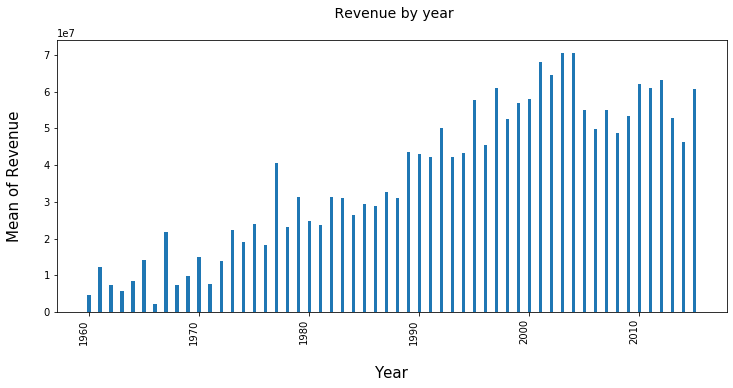

In [545]:
plt.figure(figsize = (12,5))
plt.bar(revenue_by_year.index, revenue_by_year['revenue'], width = 0.3);
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light',fontsize= 10);
plt.title(' Revenue by year\n', fontsize = 14);
plt.xlabel('\nYear', fontsize = 15);
plt.ylabel('Mean of Revenue\n', fontsize = 15);

### Conclusion

The mean revenue generated is growing with the years. The revenue was below 35 million dollars till 1988 expect during the year of 1977. But after 1988, we can observe a good improvement in the revenu over the years with 2003 and 2004 as the highest revenue years with ~ 70 million dollars.

### (5) Who are the actors appeared most which production houses produced the most?

In [546]:
actors_list = tmdb.cast.str.cat(sep='|').split('|')

In [547]:
df_actors = pd.DataFrame({'actors' : actors_list})

In [548]:
df_actors['actors'].value_counts().head()

Robert De Niro       68
Samuel L. Jackson    65
Bruce Willis         61
Nicolas Cage         59
Michael Caine        50
Name: actors, dtype: int64

In [549]:
production_companies_list = tmdb.production_companies.str.cat(sep='|').split('|')

In [550]:
df_production_companies = pd.DataFrame({'production_companies' : production_companies_list})

In [551]:
df_production_companies['production_companies'].value_counts().head()

Warner Bros.                              495
Universal Pictures                        490
Paramount Pictures                        419
Twentieth Century Fox Film Corporation    275
Columbia Pictures                         268
Name: production_companies, dtype: int64

### Conclusion

`Robert De Niro`, `Samuel L. Jackson`, `Bruce Willis`, `Nicolas Cage`, `Michael Caine` are the top-5 actors who appreard in most movies with 68,65,61,59,50 respectively

`Warner Bros.` , `Universal Pictures` , `Paramount Pictures`, `Twentieth Century Fox Film Corporation`, `Columbia Pictures`   are the top -5 production companies produced the most films